In [2]:
import numpy as np
import pandas as pd

In [5]:
tot_data = pd.read_csv('./data_preview/total.csv')
print(tot_data)

    file type  patient name  slice               shape
0    CBCT-MCS         김춘구 1    256  (256, 512, 512, 3)
1    CBCT-MCS         천언성 1    512  (512, 512, 512, 3)
2    CBCT-MCS         권세환 1    512  (512, 512, 512, 3)
3    CBCT-MCS         김은식 1    256  (256, 512, 512, 3)
4    CBCT-MCS         정새롬 1    512  (512, 512, 512, 3)
..        ...           ...    ...                 ...
234    MCS 모음    LEE SE JIN    260  (260, 512, 512, 3)
235    MCS 모음         이현무 1    304  (304, 512, 512, 3)
236    MCS 모음  10617376 서동진    174  (174, 512, 512, 3)
237    MCS 모음         유승림 1    255  (255, 512, 512, 3)
238    MCS 모음         이정혁 1    247  (247, 512, 512, 3)

[239 rows x 4 columns]


In [13]:
tot_data['slice']

0      256
1      512
2      512
3      256
4      512
      ... 
234    260
235    304
236    174
237    255
238    247
Name: slice, Length: 239, dtype: int64

In [20]:
b = 0
a = [ b + i for i in tot_data['slice']]
print(sum(a))

59104


## 비율 확인

In [21]:
import os

In [25]:
root = '/data1/Dental/MCS-CT 영상 데이터-19년7월15일-김정웅/MCS모음-19-7월-1/완료한것/10021164 김소연/'

root_path = os.path.join(root, 'Mx Mn')

mxmn_path = [os.path.join(root_path, img) for img in sorted(os.listdir(root_path))]

In [28]:
from utils import *

In [29]:
mm_ = load_3d_vol(mxmn_path, 'rgb')
mm_.shape

(148, 512, 512, 3)

In [30]:
mask = make_mask(mm_)
mask.shape

(148, 512, 512, 3)

In [31]:
import matplotlib.pyplot as plt

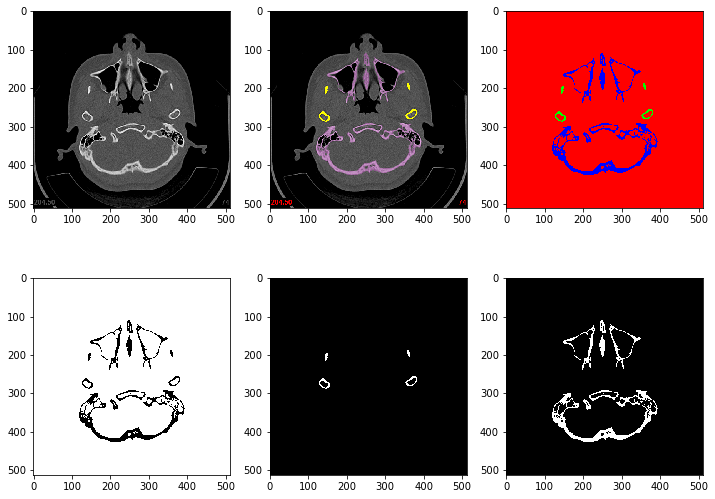

In [127]:
idx = 74

plt.figure(figsize=(12,9))
plt.subplot(231)
plt.imshow(ori_[idx], cmap='gray')

plt.subplot(232)
plt.imshow(mm_[idx], cmap='gray')

plt.subplot(233)
plt.imshow(mask[idx], cmap='gray')

plt.subplot(234)
plt.imshow(mask[idx, ... , 0], cmap='gray')

plt.subplot(235)
plt.imshow(mask[idx, ... , 1], cmap='gray')

plt.subplot(236)
plt.imshow(mask[idx, ... , 2], cmap='gray')

In [111]:
bground = [mask[i, ..., 0].sum() for i in range(len(mm_))]
mx = [mask[i, ..., 2].sum() for i in range(len(mm_))]
mn = [mask[i, ..., 1].sum() for i in range(len(mm_))]
tot = 262144 * len(mm_)

bground_ = np.array(bground)
mx_ = np.array(mx)
mn_ = np.array(mn)

bground_p = bground_.sum() /tot
mx_p = mx_.sum() / tot
mn_p = mn_.sum() / tot

print('MX 비율 : ',mx_p, '%')
print('MN 비율 : ',mn_p, '%')
print('Background 비율 : ', bground_p, '%')

MX 비율 :  0.027616835929252005 %
MN 비율 :  0.005711916330698374 %
Background 비율 :  0.9666712477400496 %


## patch 뜯기 

### 1. size 48x48

In [1]:
import os
import numpy as np

from utils import *

In [12]:
root = '/data1/Dental/MCS-CT 영상 데이터-19년7월15일-김정웅/'
root_dict = ['CBCT-Mcs-19-7-1/완료/','COM-MCS-19-7-1/완료된것들/', 'MCS모음-19-7월-1/완료한것/']

root_paths = [os.path.join(root, i) for i in root_dict]

x_list=[]
y_list=[]
patch_size = 48

idx = 0

# for root_path in root_paths:
#     pat_list = os.listdir(root_path)

pat_list = os.listdir(root_paths[idx])
    
for pat in pat_list:
    pat_paths = os.path.join(root_paths[idx], pat)

    ori_paths = os.path.join(pat_paths, 'original')
    mxmn_paths = os.path.join(pat_paths, 'Mx Mn') 

    ori_list = [os.path.join(ori_paths, i) for i in sorted(os.listdir(ori_paths))]
    mxmn_list = [os.path.join(mxmn_paths, i) for i in sorted(os.listdir(mxmn_paths))]

    print(pat)

    if len(mxmn_list):
        ori_ = load_3d_vol(ori_list, 'gray')
        mm_ = load_3d_vol(mxmn_list, 'rgb')

        mask_mm = make_mask(mm_).astype(np.uint8)  # 데이터중 float64 데이터 포함되어있음.
        print(ori_.shape, mm_[..., 0].shape, mask_mm[..., 0].shape)

    if ori_.shape != mask_mm[..., 0].shape : 
        print('ori and mask is not same')
        continue

    s, c, a, _ = mask_mm.shape

    for i in range(s):
        for j in range(0, c-patch_size+1, patch_size//2):
            for k in range(0, a-patch_size+1, patch_size//2):
                tmp = mask_mm[i, j:j+patch_size, k:k+patch_size][..., 0]
                if tmp.shape != (patch_size, patch_size) : continue
                val = tmp.sum()
                if val/(patch_size**2)>0.5 : continue
                x_list.append(ori_[i, j:j+patch_size, k:k+patch_size])
                y_list.append(mask_mm[i, j:j+patch_size, k:k+patch_size])

                    

김춘구 1
(256, 512, 512) (256, 512, 512) (256, 512, 512)
천언성 1
(512, 512, 512) (512, 512, 512) (512, 512, 512)
권세환 1
(512, 512, 512) (512, 512, 512) (512, 512, 512)
김은식 1
(256, 512, 512) (256, 512, 512) (256, 512, 512)
정새롬 1
(512, 512, 512) (512, 512, 512) (512, 512, 512)
이재원 1
(171, 512, 512) (171, 512, 512) (171, 512, 512)
최수정 1
(511, 512, 512) (511, 512, 512) (511, 512, 512)
최대린 1
(512, 512, 512) (512, 512, 512) (512, 512, 512)
김태현 1
(171, 512, 512) (171, 512, 512) (171, 512, 512)
양인용 1
(256, 512, 512) (256, 512, 512) (256, 512, 512)
김영재 1
(511, 512, 512) (511, 512, 512) (511, 512, 512)
김동현 1
(512, 512, 512) (512, 512, 512) (512, 512, 512)
김현욱 1
(256, 512, 512) (256, 512, 512) (256, 512, 512)
백미라 1
(171, 512, 512) (171, 512, 512) (171, 512, 512)
천명호 1
(256, 512, 512) (256, 512, 512) (256, 512, 512)
편소라 1
(460, 512, 512) (460, 512, 512) (460, 512, 512)
변상원 1
(256, 512, 512) (256, 512, 512) (256, 512, 512)
김희재 1
(171, 512, 512) (171, 512, 512) (171, 512, 512)
이동은 1
(256, 512, 512) (256, 

In [13]:
x_lists = np.array(x_list)
y_lists = np.array(y_list)
print(x_lists.shape)
print(x_lists[..., np.newaxis].shape)
print(y_lists.shape)

(19711, 48, 48)
(19711, 48, 48, 1)
(19711, 48, 48, 3)


In [14]:
np.save('./data/2d/x_CBCT_size_48.npy', x_lists[..., np.newaxis])
np.save('./data/2d/y_CBCT_size_48.npy', y_lists)

</br>

### code testing

In [3]:
root = '/data1/Dental/MCS-CT 영상 데이터-19년7월15일-김정웅/MCS모음-19-7월-1/완료한것/10021164 김소연/'

ori_paths = os.path.join(root, 'original')
mxmn_paths = os.path.join(root, 'Mx Mn')

ori_path = [os.path.join(ori_paths, img) for img in sorted(os.listdir(ori_paths))]
mxmn_path = [os.path.join(mxmn_paths, img) for img in sorted(os.listdir(mxmn_paths))]

ori_ = load_3d_vol(ori_path, 'gray')
mm_ = load_3d_vol(mxmn_path, 'rgb')

mask_mm = make_mask(mm_)

In [4]:
mask_mm.shape

(148, 512, 512, 3)

In [5]:
ori_.shape

(148, 512, 512)

In [10]:
x_list=[]
y_list=[]
patch_size = 48

#     if ori.shape != mask_mm[..., 0].shape : continue
s, c, a, _ = mask_mm.shape

for i in range(s):
    for j in range(0, c-patch_size+1, patch_size//2):
        for k in range(0, a-patch_size+1, patch_size//2):
            tmp = mask_mm[i, j:j+patch_size, k:k+patch_size][..., 0]
            if tmp.shape != (patch_size, patch_size) : continue
            val = tmp.sum()
            if val/(patch_size**2)>0.5 : continue
            x_list.append(ori_[i, j:j+patch_size, k:k+patch_size])
            y_list.append(mask_mm[i, j:j+patch_size, k:k+patch_size])
            

In [11]:
x_lists = np.array(x_list)
y_lists = np.array(y_list)
print(x_lists.shape)
print(y_lists.shape)

(112, 48, 48)
(112, 48, 48, 3)


In [14]:
np.save('./data/2d/x_test_size_48.npy', x_lists)
np.save('./data/2d/y_test_size_48.npy', y_lists)

In [164]:
%pwd

'/ryan/project/Segmentation_test'